In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x = pd.read_csv('../Data/intermediate_results/x_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis = 1)

In [3]:
x.head()

,opening_gross,screens,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,2451.0,10.0,12000000.0,2015.0,1.85,111.0,2059.0,12000000.0,7.5
1,8330681.0,2271.0,13000000.0,1999.0,1.85,97.0,37907.0,16000000.0,7.2
2,19883351.0,2704.0,85000000.0,2000.0,1.85,100.0,4182.0,85000000.0,4.8
3,5329240.0,2331.0,20000000.0,2009.0,2.35,108.0,2799.0,22000000.0,5.6
4,923715.0,19.0,20000000.0,2013.0,2.35,134.0,4251.0,20000000.0,8.1


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

cross_validate(KNeighborsRegressor(), x, y, cv = 5)

{'fit_time': array([0.13280058, 0.00998306, 0.01100135, 0.01100087, 0.01100016]),
 'score_time': array([0.01000786, 0.01000357, 0.00902247, 0.010005  , 0.00937676]),
 'test_score': array([0.59521464, 0.63008099, 0.68877231, 0.79658123, 0.56698382])}

In [5]:
cross_validate(KNeighborsRegressor(n_neighbors=10), x, y, cv = 5)

{'fit_time': array([0.01302958, 0.0130043 , 0.01100349, 0.01100326, 0.01099896]),
 'score_time': array([0.01200199, 0.00900126, 0.01100326, 0.01100039, 0.0090239 ]),
 'test_score': array([0.65425816, 0.64589946, 0.71602186, 0.79134945, 0.57467257])}

In [6]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [7]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             x,
                                             y, 
                                             param_name = 'n_neighbors',
                                             param_range = n,
                                             cv = 5)

In [8]:
np.mean(train_scores, axis = 1)

array([0.87136353, 0.79373935, 0.77011974, 0.75509253, 0.74377135,
       0.73232714, 0.72350489, 0.71622227, 0.71192815, 0.70750803,
       0.70361001, 0.69985421, 0.69518299, 0.69312051, 0.69000429,
       0.68709202, 0.68381568, 0.68056013, 0.67776498, 0.6756481 ,
       0.6732354 , 0.67160793, 0.66892584, 0.66594317])

No handles with labels found to put in legend.


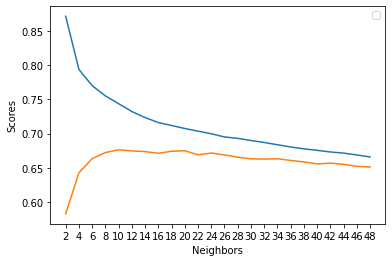

In [9]:
plt.plot(np.mean(train_scores, axis = 1))
plt.plot(np.mean(test_scores, axis = 1))
plt.xticks(np.arange(24),n)
plt.xlabel('Neighbors')
plt.ylabel('Scores')
plt.legend()


In [17]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),x,y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

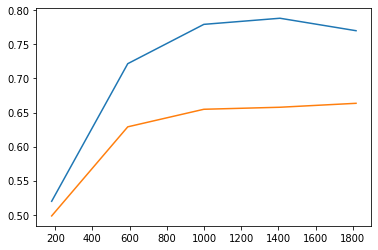

In [18]:
plt.plot(samples, np.mean(train,axis = 1))
plt.plot(samples, np.mean(test,axis = 1))